In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)

get_ipython().run_line_magic('config', "InlineBackend.figure_format = 'retina'")

# Theorem

Suppose the target distribution we'd like to sample from is defined by the CDF $F_X(x)$, which is monotonic and has an inverse function $F_X^{-1}(y)$, if we sample $Y$ from the uniform distribution between (0, 1), then $F_X^{-1}(Y)$ follows the distribution defined by $F_X(x)$, i.e.

\begin{align*}
P\left(F_X^{-1}(Y) \le x \right) = F_X(x)
\end{align*}

**Proof**: apply $F_X(x)$ to both sides of the inequality on the left side,

\begin{align*}
P\left(F_X(F_X^{-1}(Y)) \le F_X(x) \right) 
&= P\left(Y \le F_X(x) \right) \\
&= F_X(x)
\end{align*}

the second equality immediately follows because $Y$ is uniformly distributed between $(0, 1)$.

When $F_X(x)$ has some flat region, the proof can be adapted by defining $F_X^{-1}(y) = \inf \{x: F_X(x) \ge y \}$ (See more details on Page 54 of https://www.amazon.ca/Statistical-Inference-George-Casella/dp/0534243126.

# Demo

We'll use exponential distribution for an example:

Probability distribution function (PDF):

\begin{align*}
P(x|\lambda) \triangleq \lambda e^{-\lambda x} \mathbb{I}(x \ge 0)
\end{align*}

Cumulative distribution function (CDF):

\begin{align*}
F(x) = 1 - e^{-\lambda x} \mathbb{I}(x \ge 0)
\end{align*}

Inverse CDF:

\begin{align*}
F^{-1}(x) = - \frac{\ln(1 - p)}{\lambda}
\end{align*}

Note, $p$ is the cumulative density in $F^{-1}(x)$.

In [2]:
def pdf(x, lambda_):
    return lambda_ * np.exp(-lambda_ * x)


def cdf(x, lambda_):
    return 1 - np.exp(-lambda_ * x)


def cdf_inv(p, lambda_):
    return -np.log(1 - p) / lambda_

In [3]:
LAMBDA = 3

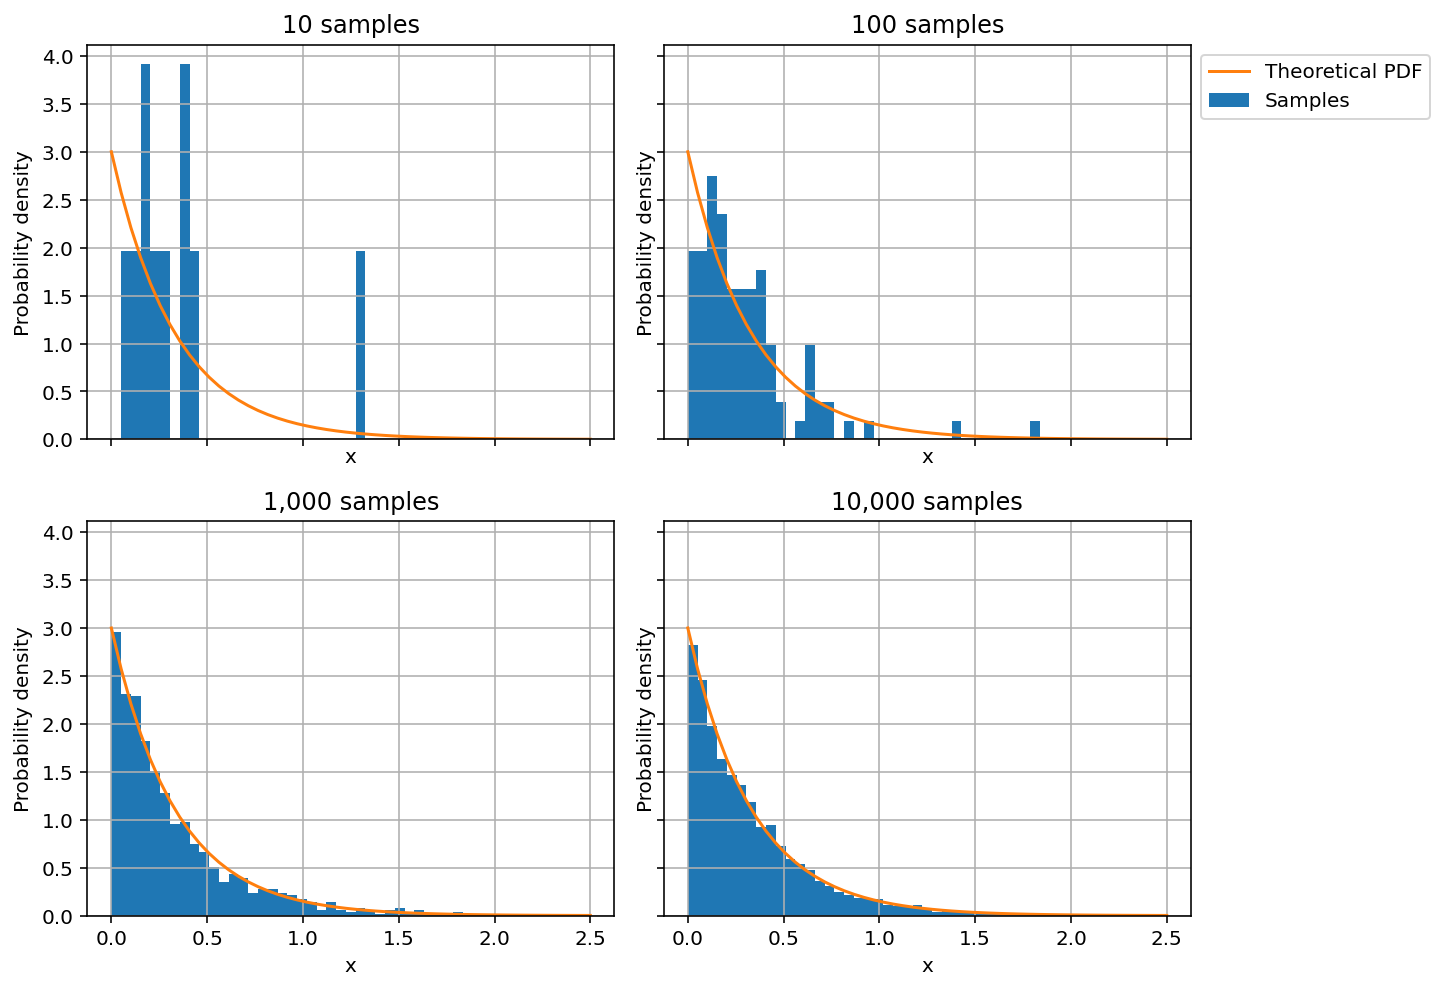

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(10, 7), sharex=True, sharey=True)
axes = axes.ravel()


bins = np.linspace(0, 2.5, 50)

for k, size in enumerate([10, 100, 1000, 10000]):
    ax = axes[k]

    # samples from uniform distribution
    samples_uniform = np.random.uniform(low=0, high=1, size=size)

    samples_inv = cdf_inv(samples_uniform, LAMBDA)

    _ = ax.hist(samples_inv, bins=bins, density=True, label="Samples")
    _ = ax.plot(bins, pdf(bins, LAMBDA), label="Theoretical PDF")

    ax.grid()

    ax.set(xlabel="x", ylabel="Probability density", title=f"{size:,} samples")

    if k == 1:
        ax.legend(bbox_to_anchor=(1, 1), loc="upper left")

plt.tight_layout()